<h2>OOP homework</h2>

The requirement is spreaded in this notebook, labeled with ### Homework Question ####

In [2]:
#from mylib import  *
import io

In [20]:
### some support function ###
def list_to_string(data):    
    return '  '.join([str(x) for x in data]) #用双空链接element为完整字符串

def Seq(n):
    return [i for i in range(n)]

def ravel(obj):
    return obj if type(obj)!=Array else obj.data

list_to_string(['1','2','3','xmu'])
Seq(8)
#ravel(Array(2))

[0, 1, 2, 3, 4, 5, 6, 7]

In [28]:
class Array:
    def __init__(self, lst):
        self.data=ravel(lst)
    
    def Sum(self):
        return sum(self.data)
    
    def Add(self, aryb):
        #assert type(aryb)==Array, 'Invalid type'
        aryb=ravel(aryb)
        return Array([x+y for x,y in zip(self.data, aryb)])

    def Len(self):
        return len(self.data)

    def Sum(self):
        return sum(self.data)

    def __repr__(self):
        return "-------\n"+list_to_string(self.data)+"\n-------\n\n"
    
    ### Homework Question ####  implementing subtrace, multiplication, division functions
        ### 实现 Subtract (减法) ###
    def Subtract(self, aryb):
        aryb = ravel(aryb)
        return Array([x - y for x, y in zip(self.data, aryb)])

    ### 实现 Multiply (乘法) ###
    def Multiply(self, aryb):
        aryb = ravel(aryb)
        return Array([x * y for x, y in zip(self.data, aryb)])

    ### 实现 Divide (除法) ###
    def Divide(self, aryb):
        aryb = ravel(aryb)
        # 检查除数是否为 0
        return Array([x / y if y != 0 else float('inf') for x, y in zip(self.data, aryb)])
        
#    @classmethod
#    def zeroOfSize(size):
#        return Array([0 for range(0, size)])


#def zeroOfSize(size):
#    return Array([0 for range(0, size)])
#zeroOfSize(10)

#Array.zeroOfSize(10)

a=Array([1,2,3,4,5])
print(a.Sum())
b=Array([10,11,12,13,14])
print(a.Add(b))
print(a.Add([2,2,2]))
print(a.Len())
print(a.Sum())

print(a.Subtract(b))
print(a.Multiply(b))
print(a.Divide(b))

15
-------
11  13  15  17  19
-------


-------
3  4  5
-------


5
15
-------
-9  -9  -9  -9  -9
-------


-------
10  22  36  52  70
-------


-------
0.1  0.18181818181818182  0.25  0.3076923076923077  0.35714285714285715
-------




In [33]:
class Series(Array):
    def __init__(self, lst, Index=None, name=None):
        #assert type(lst)==Array, 'Invalid type in parameter 0:'+str(type(lst))
        #assert type(idex)==Array, 'Invalid type in parameter 1:'+str(type(idex))
        self.data=ravel(lst)
            
        if Index==None:
            self.index=[i for i in range(len(lst))] 
        else:
            self.index=ravel(Index)         
        self.name = name  # 新增的name属性
        
    def Index(self):
        return self.index
    
#    def __repr__(self):
#        s='-----\n'
#        for idx, x in zip(self.index, self.data):
#            s+= str(idx)+'  '+str(x)+'\n'
#        return s+'-----\n'
    
    ### Homework Question ####  adding name to series
    def set_name(self, name):
        self.name = name
    
    def __repr__(self):
        s = '-----\n'
        if self.name:  # 如果有名字，显示名称
            s += f'Series name: {self.name}\n'
        for idx, x in zip(self.index, self.data):
            s += str(idx) + '  ' + str(x) + '\n'
        return s + '-----\n'
    

    
s1=Series(a,b, name="My Series")
print(s1)
print(s1.Len())
print(s1.Sum())


-----
Series name: My Series
10  1
11  2
12  3
13  4
14  5
-----

5
15


In [41]:
class Matrix(Array):
    def __init__(self, lst, nrows, ncols):
        self.data=ravel(lst)
        assert nrows*ncols==len(self.data), "Unmatched cells and the dimensions"
        self.nrows=nrows
        self.ncols=ncols
        
    def Cell(self, i,j):
        return self.data[i*self.ncols+j]
    
    def __repr__(self):
        s=''
        for i in range(self.nrows):
            s+='|  ' 
            s+= list_to_string(self.data[i*self.ncols: i*self.ncols+self.ncols])
            s+=' |\n'
        return s
    ### Homework Question ####  implementing Reshape()
    ### Homework Question ####  implementing MatMultiply

    def Reshape(self, new_nrows, new_ncols):
        assert new_nrows * new_ncols == len(self.data), "Reshape dimensions must match the total number of elements"
        self.nrows = new_nrows
        self.ncols = new_ncols
        # 返回更新后的矩阵
        return self
    
    ### Homework Question ####  implementing MatMultiply
    def MatMultiply(self, other):
        assert self.ncols == other.nrows, "Matrix multiplication is not possible, column count of A must match row count of B"
        
        result = []
        for i in range(self.nrows):
            for j in range(other.ncols):
                # 计算第 i 行第 j 列的结果
                sum_value = sum(self.Cell(i, k) * other.Cell(k, j) for k in range(self.ncols))
                result.append(sum_value)
        
        # 返回新矩阵，行数是 self.nrows，列数是 other.ncols
        return Matrix(result, self.nrows, other.ncols)
    
mx1=Matrix([1,2,3,4,5,6,7,8], 2,4)
print(mx1)

mx2=Matrix(Array([1,2,3,4,5,6,7,8]), 4,2)
print(mx2)

print(mx1.Sum())  #inhrited from the Array
print(mx1.Len())  #inherited from the Array

result = mx1.MatMultiply(mx2)
print(result)

mx2.Reshape(2, 4)
print(mx2)



|  1  2  3  4 |
|  5  6  7  8 |

|  1  2 |
|  3  4 |
|  5  6 |
|  7  8 |

36
8
|  50  60 |
|  114  140 |

|  1  2  3  4 |
|  5  6  7  8 |



<h2>Visualization homework</h2>

### Problem 1: Basic Line Plot
Create a simple line plot using the following data:
- x-values: `[0, 1, 2, 3, 4, 5]`
- y-values: `[0, 1, 4, 9, 16, 25]`
Make sure to:
- Label the axes appropriately.
- Title the plot "Quadratic Function".
- Display the grid.

### Problem 2: Scatter Plot
Using the same data as in Problem 1, create a scatter plot instead. Additionally:
- Change the marker style to 'o'.
- Use a different color for the markers.
- Add a legend that identifies the points as "y = x^2".

### Problem 3: Bar Chart (refer to https://pythonbasics.org/matplotlib-bar-chart/)
Create a bar chart that shows the sales data for a fictional product over five months. Use the following information:
- Months: `['January', 'February', 'March', 'April', 'May']`
- Sales: `[150, 200, 250, 300, 280]`
Make sure to:
- Label the x-axis as "Months" and the y-axis as "Sales".
- Title the chart "Monthly Sales Data".

### Problem 4: Histogram
Generate a histogram of a random dataset. Follow these steps:
- Use NumPy to create an array of 1000 random numbers following a normal distribution with a mean of 0 and a standard deviation of 1.
- Plot the histogram with 30 bins.
- Add labels and a title to the plot, naming it "Histogram of Normally Distributed Data".

### Problem 5: Subplots
Create a figure that contains the following two subplots:
1. A line plot and scatter plot of the data from Problem 1 on the same axes.
2. A bar chart using the data from Problem 3.
Make sure to:
- Use proper titles for each subplot.
- Add appropriate axis labels.
- Share the x-axis between the two subplots.

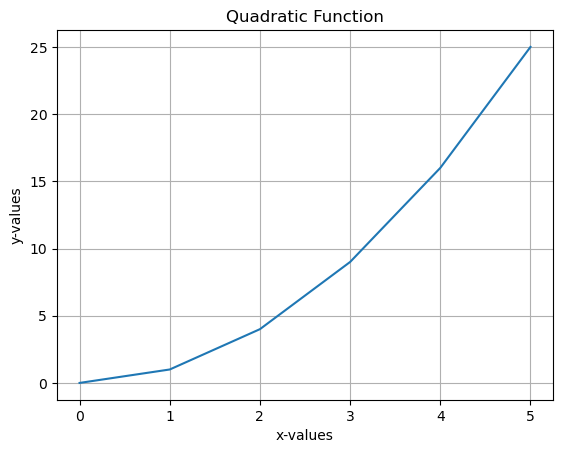

In [25]:
import matplotlib.pyplot as plt
import numpy as np
# Problem 1:
x_values = [0, 1, 2, 3, 4, 5]
y_values = [0, 1, 4, 9, 16, 25]
    
plt.figure()
plt.plot(x_values, y_values)
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.title('Quadratic Function')
plt.grid(True)
plt.show()

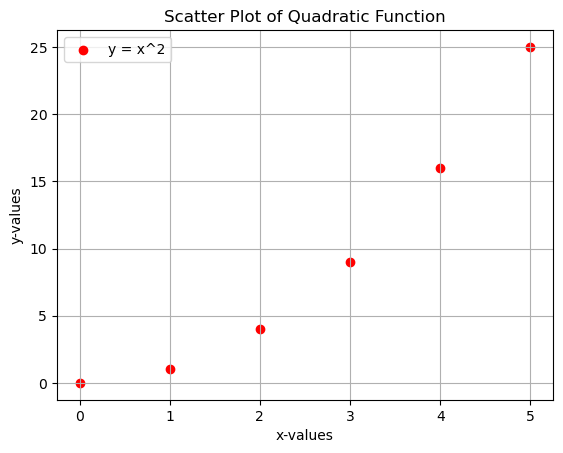

In [30]:
# Problem 2:
plt.scatter(x_values, y_values, marker='o', color='red', label='y = x^2')
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.legend()
plt.title('Scatter Plot of Quadratic Function')
plt.grid(True)
plt.show()

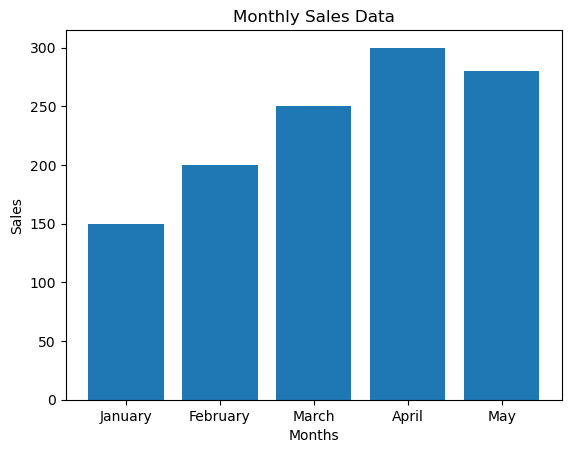

In [31]:
# Problem 3:
months = ['January', 'February', 'March', 'April', 'May']
sales = [150, 200, 250, 300, 280]

plt.bar(months, sales)
plt.xlabel('Months')
plt.ylabel('Sales')
plt.title('Monthly Sales Data')
plt.show()


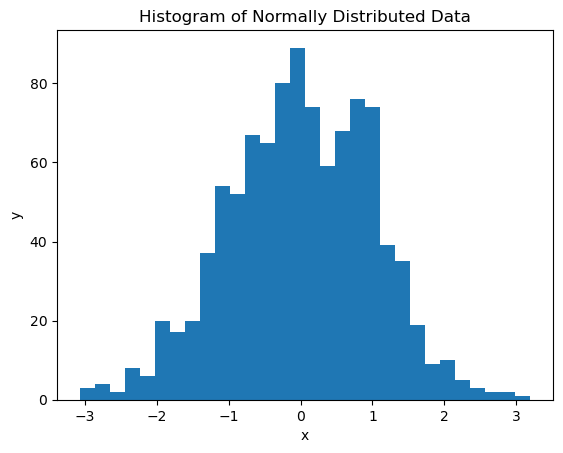

In [36]:
# Problem 4:
myset = np.random.normal(0,1,1000)
plt.hist(myset, bins = 30)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Histogram of Normally Distributed Data')
plt.show()

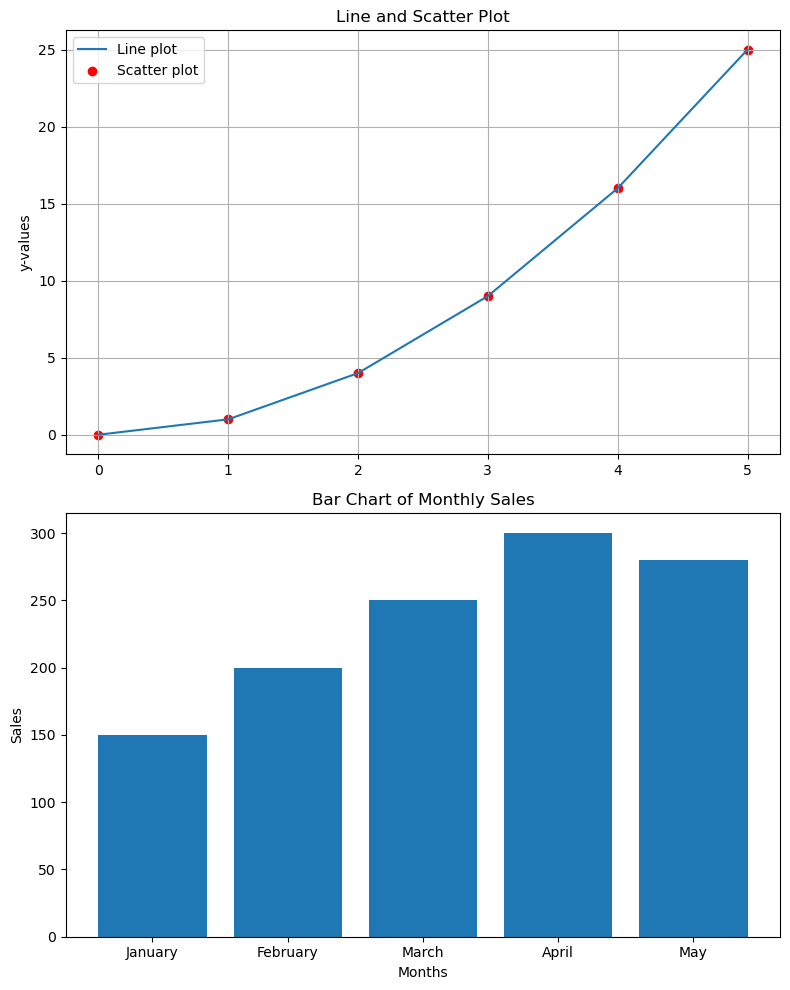

In [38]:
# Problem 5:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=False, figsize=(8, 10))
#fig 是整个图形对象的引用，表示包含子图的整体图像，ax_i为子图

# Line and scatter plot in the first subplot
ax1.plot(x_values, y_values, label='Line plot')
ax1.scatter(x_values, y_values, color='red', label='Scatter plot')
ax1.set_title('Line and Scatter Plot')
ax1.set_ylabel('y-values')
ax1.legend()
ax1.grid(True)

# Bar chart in the second subplot
ax2.bar(months, sales)
ax2.set_title('Bar Chart of Monthly Sales')
ax2.set_xlabel('Months')
ax2.set_ylabel('Sales')

plt.tight_layout()
plt.show()

<h2>Simulation homework</h2>

### Problem 1: Central Limit Theorem Simulation
Simulate the Central Limit Theorem (CLT) using the following steps:
- Generate 1000 samples, each containing 30 random numbers from a uniform distribution ranging from 0 to 1.
- Calculate the mean of each sample and store these means in a separate list.
- Plot a histogram of the sample means and indicate that it should approximate a normal distribution.
- Overlay the normal distribution curve on the histogram to visualize the CLT.

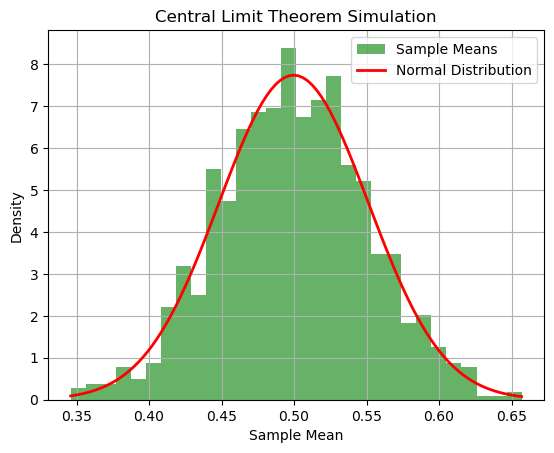

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Step 1: Generate 1000 samples, each with 30 random numbers from uniform distribution [0, 1]
num_samples = 1000
sample_size = 30
sample_means = [np.mean(np.random.uniform(0, 1, sample_size)) for i in range(num_samples)]
# means中每一个`bar{X}`都近似正态，N(0.5=(a+b)/2,sigma/sqrt(30))

# Step 2: Plot a histogram of the sample means
plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='g', label='Sample Means')

# Step 3: Overlay the normal distribution curve
mean = np.mean(sample_means) #理论也可以直接写结果，但得从数据出发
std_dev = np.std(sample_means)
x = np.linspace(min(sample_means), max(sample_means), 100)
pdf = stats.norm.pdf(x, mean, std_dev)
plt.plot(x, pdf, 'r-', lw=2, label='Normal Distribution')

plt.title('Central Limit Theorem Simulation')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()
